In [1]:
from astropy.io import ascii

In [3]:
a2744coord = ascii.read("a2744")

In [4]:
def extrac(cat):
    RA,DEC=[],[]
    for i in cat:
        RA.append(i[1])
        DEC.append(i[2])
    return RA,DEC

def sextrac(cat):
    RA,DEC=[],[]
    for i in cat:
        RA.append(i[7])
        DEC.append(i[8])
    return RA,DEC   


In [5]:
RAa2744,DECa2744=extrac(a2744coord)

In [6]:
#WCS to PIxel
from astropy.wcs import WCS

a2744wcs = WCS('a2744.fits')
a2744pix=[]


for i in range(0,len(RAa2744)):
    RAa, DECa = a2744wcs.wcs_world2pix(RAa2744[i], DECa2744[i],0)
    x=[float(RAa),float(DECa)]
    a2744pix.append(x)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


In [7]:
from astropy.io import fits
hdulist = fits.open('a2744.fits')
dataa2744=hdulist[0].data

import numpy as np
from astropy.nddata import Cutout2D
from astropy import units as u
import matplotlib.pyplot as plt
from subprocess import call
import os


%matplotlib inline

stamps=[]

from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(ra=RAa2744*u.degree, dec=DECa2744*u.degree)
c=c.to_string('hmsdms')



for i in a2744pix:
    position = (i[0], i[1])
    size = (100, 100)
    cutout = Cutout2D(dataa2744, position, size)
    stamps.append(cutout.data)

    
    i=0
for stamp in stamps:
    #print i+1
    #print a2744pix[i]
    #print c[i]
    
    #hdu = fits.PrimaryHDU(stamp)
    #hdulist = fits.HDUList([hdu])  
    #hdulist.writeto('stamps/a2744stamp'+str(i+1)+'.fits')
    
    outp='AP_a2744stamp'+str(i+1)+'.fits'
    cat='a2744stamp'+str(i+1)+'.cat'
    
    
    with open("configa2744.txt") as f:
        content = f.readlines()

    content = [x.strip() for x in content] 
    nombrecat=content[8].split()
    nombrecat[1]=cat
    content[8]="    ".join(nombrecat)
    nombreout=content[78].split()
    nombreout[1]=outp
    content[78]="    ".join(nombreout)
    
    
    f = open('config.txt','w') 

    for j in content:
        f.write(j+'\n') 

    f.close() 
    
    sex='sextractor SC-F814.fits -c config.txt'
    sex=sex.split()
    sex[1]='a2744stamp'+str(i+1)+'.fits'
    
    sex=" ".join(sex)

    os.system(sex)
    
    
    i=i+1  


# ploteo

In [33]:
import glob
ap=sorted(glob.glob('AP_a2744stamp*.fits'))
ca=sorted(glob.glob('a2744stamp*.cat'))


['a2744stamp01.cat', 'a2744stamp02.cat', 'a2744stamp03.cat', 'a2744stamp04.cat', 'a2744stamp05.cat', 'a2744stamp06.cat', 'a2744stamp07.cat', 'a2744stamp08.cat', 'a2744stamp09.cat', 'a2744stamp10.cat', 'a2744stamp11.cat', 'a2744stamp12.cat', 'a2744stamp13.cat', 'a2744stamp14.cat', 'a2744stamp15.cat', 'a2744stamp16.cat', 'a2744stamp17.cat', 'a2744stamp18.cat', 'a2744stamp19.cat', 'a2744stamp20.cat', 'a2744stamp21.cat', 'a2744stamp22.cat', 'a2744stamp23.cat', 'a2744stamp24.cat', 'a2744stamp25.cat', 'a2744stamp26.cat', 'a2744stamp27.cat', 'a2744stamp28.cat', 'a2744stamp29.cat', 'a2744stamp30.cat', 'a2744stamp31.cat', 'a2744stamp32.cat', 'a2744stamp33.cat', 'a2744stamp34.cat', 'a2744stamp35.cat', 'a2744stamp36.cat', 'a2744stamp37.cat', 'a2744stamp38.cat', 'a2744stamp39.cat']


#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



/home/zapredfield/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10


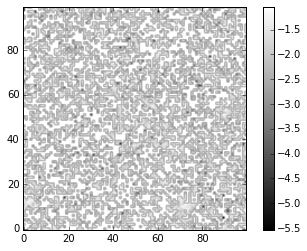

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     1.717096     1.315776  25.4130   0.8322

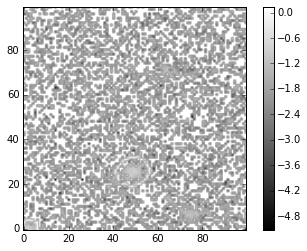

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     730.0316     27.02683  18.8416   0.0402

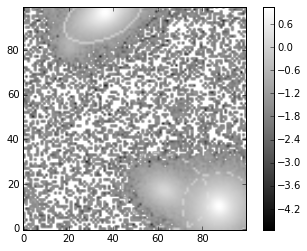

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



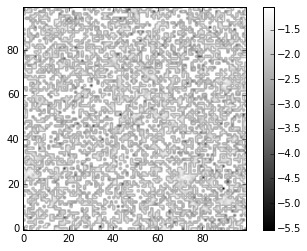

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     199.5144     14.14122  20.2501   0.0770

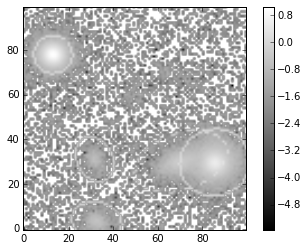

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



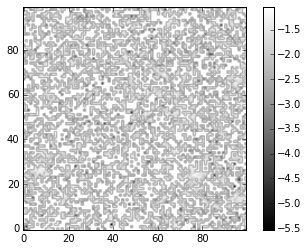

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



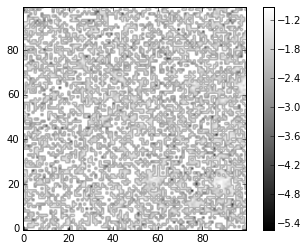

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     2.490221     1.585239  25.0094   0.6913

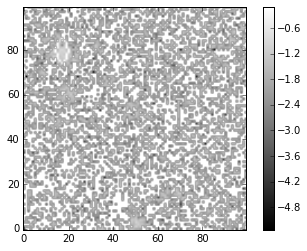

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     10.14322     3.201155  23.4846   0.3427

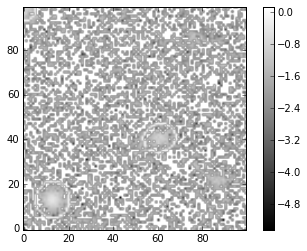

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     36.69002     6.089322  22.0886   0.1802

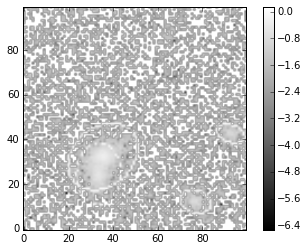

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     40.10001     6.352459  21.9921   0.1720

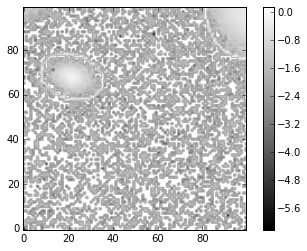

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



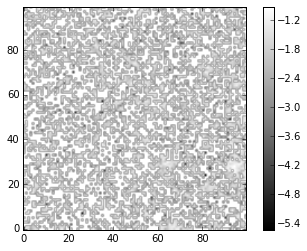

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     11.90372     3.468948  23.3108   0.3165

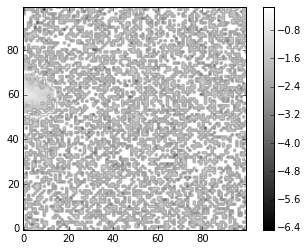

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     5.488467     2.361196  24.1514   0.4672

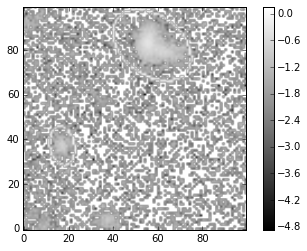

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     40.23272     6.377911  21.9886   0.1722

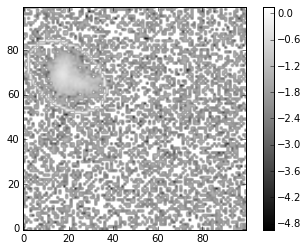

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     21.51638     4.665056  22.6681   0.2355

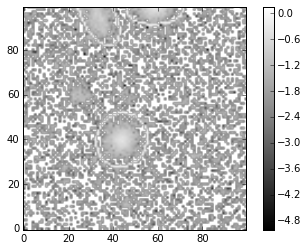

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     5.488467     2.361197  24.1514   0.4672

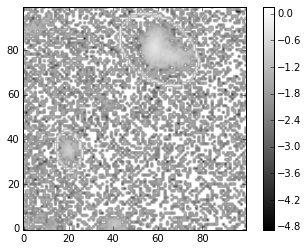

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     17.32537     4.181752  22.9033   0.2621

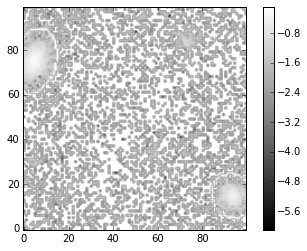

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     184.6518     13.60186  20.3341   0.0800

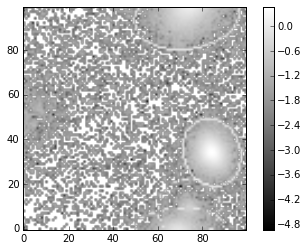

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



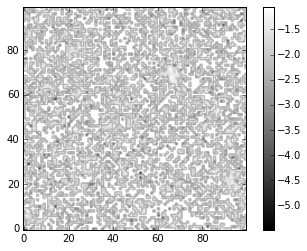

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



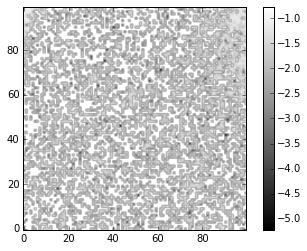

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     1731.551     41.70876  17.9039   0.0262

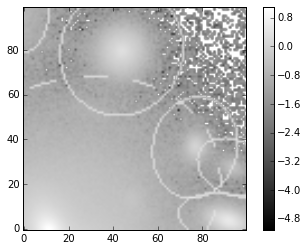

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     11.41625     3.394756  23.3562   0.3229

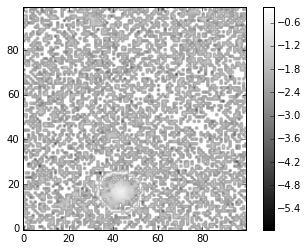

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     27.97137     5.303769  22.3832   0.2059

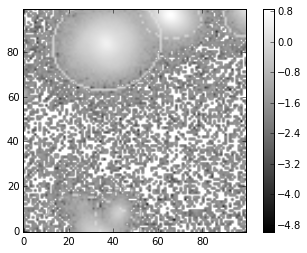

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     19.03705     4.377684  22.8010   0.2497

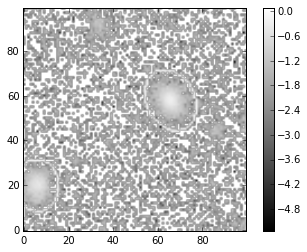

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     11.34316     3.393867  23.3632   0.3249

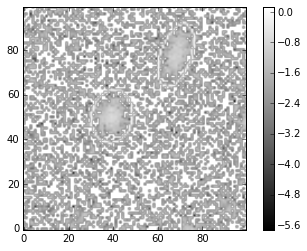

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1      98.9017     9.956949  21.0120   0.1093

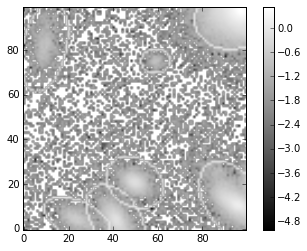

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     270.2755     16.45364  19.9205   0.0661

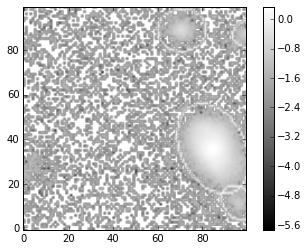

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     5.600891     2.384033  24.1294   0.4623

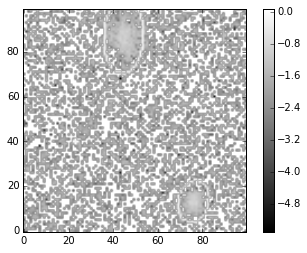

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



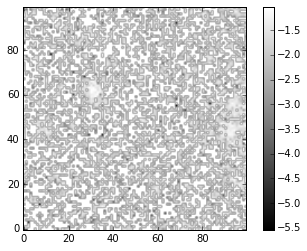

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          



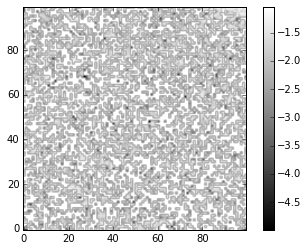

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     231.7006     15.22515  20.0877   0.0714

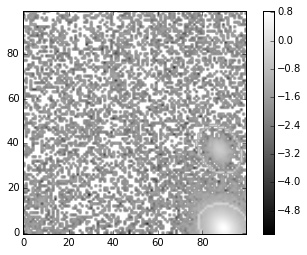

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1      214.355     14.65098  20.1722   0.0742

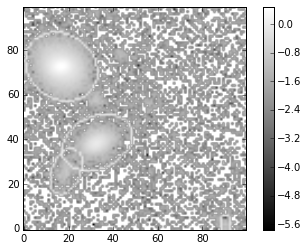

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1      25.3164     5.055805  22.4915   0.2169

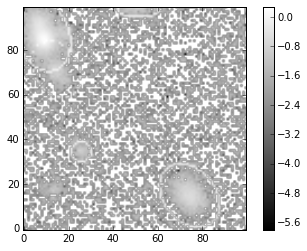

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     35.40757     5.964284  22.1273   0.1829

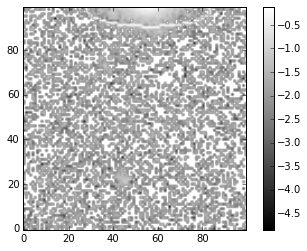

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     10.58783     3.269352  23.4380   0.3353

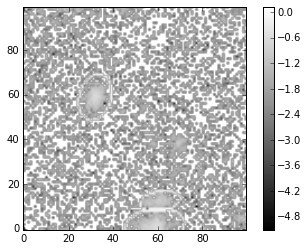

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     351.2241     18.75186  19.6360   0.0580

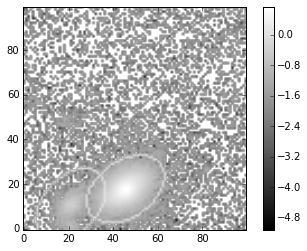

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     11.41625     3.394686  23.3562   0.3229

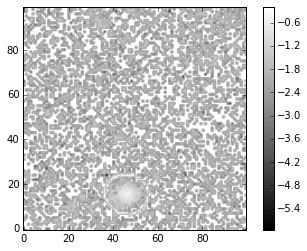

#   1 NUMBER                 Running object number                                     

#   2 FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]

#   3 FLUXERR_AUTO           RMS error for AUTO flux                                    [count]

#   4 MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]

#   5 MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLAGS                  Extraction flags                                          

         1     1.450465      1.20953  25.5962   0.9056

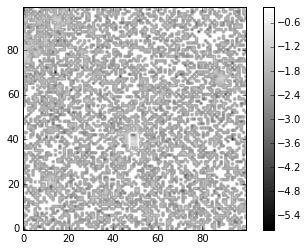

In [42]:
from astropy.io import fits

for i in range(0,len(ap)):
    hdulist = fits.open(ap[i])
    data=hdulist[0].data
    
    with open(ca[i]) as f:
        content = f.readlines()
        
    for j in content:
        print j
        
    plt.imshow(np.log10(data),cmap='gray')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()
